In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/prep0122116_train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Datasets/prep0122116_test.csv')

# **EDA**

In [ ]:
train.head()

,Unnamed: 0,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,854,Developing,62.9,286.0,16.5,0.7,96.0,96.0,582.775532,0.405,5.0
1,1453,Developed,71.0,26.0,56.6,0.1,99.0,99.0,6351.812500,0.776,15.5
2,2921,Developing,43.8,614.0,16.8,18.7,85.0,85.0,341.955625,0.418,9.6
3,2521,Developed,83.4,49.0,57.4,0.1,97.0,97.0,8989.842400,0.938,16.0
4,2931,Developing,45.4,7.0,27.9,26.8,7.0,71.0,414.796232,0.408,9.5


In [ ]:
test.head()

,Unnamed: 0,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,564,Developing,75.2,91.0,29.0,0.1,99.0,99.0,5633.796160,0.700,12.8
1,960,Developing,59.8,37.0,28.7,10.1,45.0,44.0,3976.148870,0.633,12.3
2,2265,Developing,75.6,121.0,6.0,0.1,95.0,95.0,5237.255334,0.775,14.4
3,132,Developed,88.0,73.0,55.7,0.1,89.0,89.0,51126.741390,0.880,15.7
4,2123,Developed,74.3,139.0,57.7,0.1,89.0,89.0,92.277825,0.798,15.7


In [ ]:
train.shape

(1764, 11)

In [ ]:
test.shape

(441, 11)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1764 non-null   int64  
 1   Status                           1764 non-null   object 
 2   Life expectancy                  1764 non-null   float64
 3   Adult Mortality                  1764 non-null   float64
 4   BMI                              1764 non-null   float64
 5   HIV/AIDS                         1764 non-null   float64
 6   Diphtheria                       1764 non-null   float64
 7   Polio                            1764 non-null   float64
 8   GDP                              1764 non-null   float64
 9   Income composition of resources  1764 non-null   float64
 10  Schooling                        1764 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 151.7+ KB


In [ ]:
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]

In [ ]:
train.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,Developing,62.9,286.0,16.5,0.7,96.0,96.0,582.775532,0.405,5.0
1,Developed,71.0,26.0,56.6,0.1,99.0,99.0,6351.812500,0.776,15.5
2,Developing,43.8,614.0,16.8,18.7,85.0,85.0,341.955625,0.418,9.6
3,Developed,83.4,49.0,57.4,0.1,97.0,97.0,8989.842400,0.938,16.0
4,Developing,45.4,7.0,27.9,26.8,7.0,71.0,414.796232,0.408,9.5


In [ ]:
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

In [ ]:
test.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,Developing,75.2,91.0,29.0,0.1,99.0,99.0,5633.796160,0.700,12.8
1,Developing,59.8,37.0,28.7,10.1,45.0,44.0,3976.148870,0.633,12.3
2,Developing,75.6,121.0,6.0,0.1,95.0,95.0,5237.255334,0.775,14.4
3,Developed,88.0,73.0,55.7,0.1,89.0,89.0,51126.741390,0.880,15.7
4,Developed,74.3,139.0,57.7,0.1,89.0,89.0,92.277825,0.798,15.7


In [ ]:
train.isna().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
BMI                                0
HIV/AIDS                           0
Diphtheria                         0
Polio                              0
GDP                                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
test.isna().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
BMI                                0
HIV/AIDS                           0
Diphtheria                         0
Polio                              0
GDP                                0
Income composition of resources    0
Schooling                          0
dtype: int64

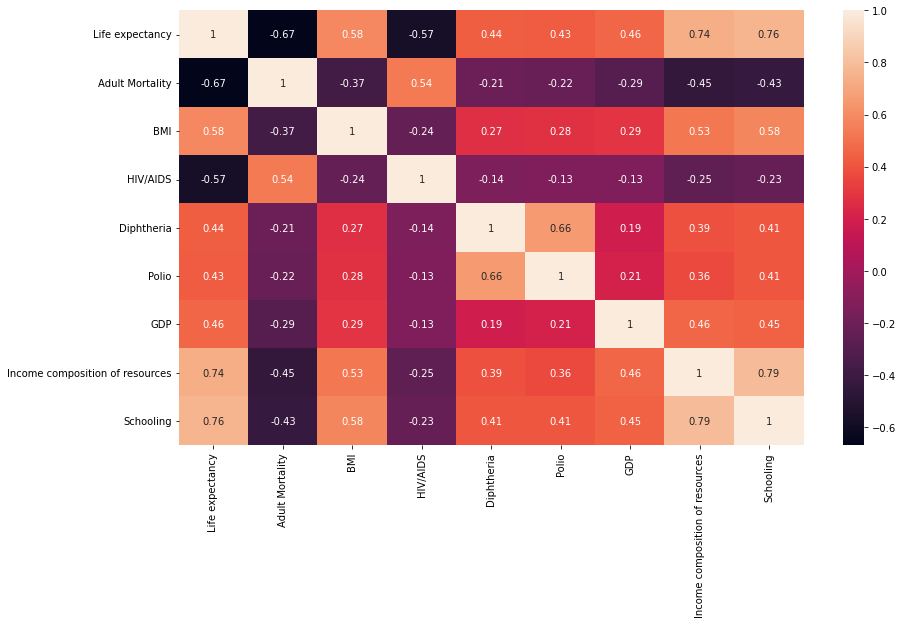

In [ ]:
plt.figure(figsize=(14,8))
correlation = train.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [ ]:
correlation.unstack().sort_values()

Life expectancy                  Adult Mortality                   -0.670124
Adult Mortality                  Life expectancy                   -0.670124
HIV/AIDS                         Life expectancy                   -0.566571
Life expectancy                  HIV/AIDS                          -0.566571
Income composition of resources  Adult Mortality                   -0.446854
                                                                      ...   
HIV/AIDS                         HIV/AIDS                           1.000000
BMI                              BMI                                1.000000
Adult Mortality                  Adult Mortality                    1.000000
Income composition of resources  Income composition of resources    1.000000
Schooling                        Schooling                          1.000000
Length: 81, dtype: float64

In [ ]:
correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool)).unstack().dropna().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Schooling                        Income composition of resources    0.794391
                                 Life expectancy                    0.762141
Income composition of resources  Life expectancy                    0.735691
Polio                            Diphtheria                         0.660331
BMI                              Life expectancy                    0.582934
Schooling                        BMI                                0.577822
HIV/AIDS                         Adult Mortality                    0.535143
Income composition of resources  BMI                                0.527010
                                 GDP                                0.463836
GDP                              Life expectancy                    0.462587
Schooling                        GDP                                0.449239
Diphtheria                       Life expectancy                    0.437837
Polio                            Life expectancy                    0.430354

1. How many independent variables/features are there in the data set?

Ans: There are 9 independant variables , i.e. Status, Adult Mortality, BMI, HIV/AIDS, Diptheria, Polio, GDP, INcome composition of resources, Schooling.

2. How many numerical features are there?

Ans: There are 9 numerical features, i.e. Life expectancy, Adult Mortality, BMI, HIV/AIDS, Diptheria, Polio, GDP, INcome composition of resources, Schooling.

3. How many categorical features are there?

Ans: There is 1 categorical feature, i.e. Status.

4. Which is the third most important feature based on correlation for regression?

Ans: BMI is the 3rd most important feature based on correlation to the dependant variable (Life expectancy) with 58.29%.


5. Which is the least important feature based on correlation for regression?

Ans: Adult Mortality is the least important feature based on correlation to the dependant variable (Life expectancy).

# **Multiple Linear Regression**

In [ ]:
train['Status'] = train['Status'].map({'Developed':True,'Developing':False})

In [ ]:
train.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,False,62.9,286.0,16.5,0.7,96.0,96.0,582.775532,0.405,5.0
1,True,71.0,26.0,56.6,0.1,99.0,99.0,6351.812500,0.776,15.5
2,False,43.8,614.0,16.8,18.7,85.0,85.0,341.955625,0.418,9.6
3,True,83.4,49.0,57.4,0.1,97.0,97.0,8989.842400,0.938,16.0
4,False,45.4,7.0,27.9,26.8,7.0,71.0,414.796232,0.408,9.5


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1764 non-null   bool   
 1   Life expectancy                  1764 non-null   float64
 2   Adult Mortality                  1764 non-null   float64
 3   BMI                              1764 non-null   float64
 4   HIV/AIDS                         1764 non-null   float64
 5   Diphtheria                       1764 non-null   float64
 6   Polio                            1764 non-null   float64
 7   GDP                              1764 non-null   float64
 8   Income composition of resources  1764 non-null   float64
 9   Schooling                        1764 non-null   float64
dtypes: bool(1), float64(9)
memory usage: 125.9 KB


In [ ]:
test['Status'] = test['Status'].map({'Developed':True,'Developing':False})
test.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,False,75.2,91.0,29.0,0.1,99.0,99.0,5633.796160,0.700,12.8
1,False,59.8,37.0,28.7,10.1,45.0,44.0,3976.148870,0.633,12.3
2,False,75.6,121.0,6.0,0.1,95.0,95.0,5237.255334,0.775,14.4
3,True,88.0,73.0,55.7,0.1,89.0,89.0,51126.741390,0.880,15.7
4,True,74.3,139.0,57.7,0.1,89.0,89.0,92.277825,0.798,15.7


In [ ]:
X_train = train.drop('Life expectancy',axis=1).values
y_train = train['Life expectancy'].values

In [ ]:
X_test = test.drop('Life expectancy',axis=1).values
y_test = test['Life expectancy'].values

In [ ]:
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg_all.predict(X_test)

1. What is mean_squared_error for the test dataset?

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('Mean squared error of test data set is : ',mse)

Mean squared error of test data set is :  15.431600114277657


2. What is r2_score for the test dataset?

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('r2_score of test data set is : ',score)

r2_score of test data set is :  0.8379338058021963


3. What is the mean absolute error for the test dataset?

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error of test data set is : ',mae)

Mean absolute error of test data set is :  3.002392071828031


4. What is the value of cost function on the train and test dataset for the model previously trained?

In [ ]:
from math import sqrt
rmse = sqrt(mse)
print('Root mean squared error of test data set is : ',rmse)

Root mean squared error of test data set is :  3.9283075381489234


5. What is mean_squared_error for the test dataset after we take top 5 features based on correlation?

In [ ]:
train_top_5 = train[['Schooling','Income composition of resources','BMI','GDP','Diphtheria','Life expectancy']]

In [ ]:
train_top_5.head()

,Schooling,Income composition of resources,BMI,GDP,Diphtheria,Life expectancy
0,5.0,0.405,16.5,582.775532,96.0,62.9
1,15.5,0.776,56.6,6351.812500,99.0,71.0
2,9.6,0.418,16.8,341.955625,85.0,43.8
3,16.0,0.938,57.4,8989.842400,97.0,83.4
4,9.5,0.408,27.9,414.796232,7.0,45.4


In [ ]:
test_top_5 = test[['Schooling','Income composition of resources','BMI','GDP','Diphtheria','Life expectancy']]

In [ ]:
test_top_5.head()

,Schooling,Income composition of resources,BMI,GDP,Diphtheria,Life expectancy
0,12.8,0.700,29.0,5633.796160,99.0,75.2
1,12.3,0.633,28.7,3976.148870,45.0,59.8
2,14.4,0.775,6.0,5237.255334,95.0,75.6
3,15.7,0.880,55.7,51126.741390,89.0,88.0
4,15.7,0.798,57.7,92.277825,89.0,74.3


In [ ]:
X_train_top_5 = train_top_5.drop('Life expectancy',axis=1).values
y_train_top_5 = train_top_5['Life expectancy'].values
X_test_top_5 = test_top_5.drop('Life expectancy',axis=1).values
y_test_top_5 = test_top_5['Life expectancy'].values

In [ ]:
reg_top_5 = LinearRegression()
reg_top_5.fit(X_train_top_5,y_train_top_5)
y_pred_top_5 = reg_top_5.predict(X_test_top_5)

5. What is mean_squared_error for the test dataset after we take top 5 features based on correlation?


In [ ]:
mse_top_5 = mean_squared_error(y_test_top_5,y_pred_top_5)
print('Mean squared error of test data set for top 5 features is : ',mse_top_5)

Mean squared error of test data set for top 5 features is :  30.274642130020275


6. What is r2_score for the test dataset after we take the top 5 features based on correlation?


In [ ]:
score_top_5=r2_score(y_test_top_5,y_pred_top_5)
print('r2_score of test data set for top 5 features is : ',score_top_5)

r2_score of test data set for top 5 features is :  0.6820487833809745


What is the predicted Life expectancy for the following countries?

a. Case 1

i. Status=Developing

ii. Adult Mortality = 730

iii. BMI = 27

iv. HIV/AIDS = 33

v. Diphtheria=70

vi. Polio =60

vii. GDP=450

viii. Income composition of resources = 0.35

ix. Schooling=10

In [ ]:
X_test_case1 = np.array([[False,730.0,27.0,33.0,70.0,60.0,450.0,0.35,10.0]])

In [ ]:
y_pred_case1 = reg_all.predict(X_test_case1)
print('Predicted life expectancy of case 1 is: ',y_pred_case1)

Predicted life expectancy of case 1 is:  [38.60216459]


b. Case 2

i. Status=Developed

ii. Adult Mortality = 100

iii. BMI = 20

iv. HIV/AIDS = 1

v. Diphtheria=7

vi. Polio =6

vii. GDP=4500

viii. Income composition of resources = 0.5

ix. Schooling=12


In [ ]:
X_test_case2 =  np.array([[True,100.0,20.0,1.0,7.0,6.0,4500.0,0.5,12]])
y_pred_case2 = reg_all.predict(X_test_case2)
print('Predicted life expectancy of case 2 is: ',y_pred_case2)

Predicted life expectancy of case 2 is:  [65.30172575]


# **Logistic regression**

In [ ]:
train_1 = train.copy()
test_1 = test.copy()

In [ ]:
train_1['Life expectancy'] = np.where(train_1['Life expectancy']>=65, True,False)

In [ ]:
test_1['Life expectancy'] = np.where(test_1['Life expectancy']>=65, True,False)

In [ ]:
train_1.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,False,False,286.0,16.5,0.7,96.0,96.0,582.775532,0.405,5.0
1,True,True,26.0,56.6,0.1,99.0,99.0,6351.812500,0.776,15.5
2,False,False,614.0,16.8,18.7,85.0,85.0,341.955625,0.418,9.6
3,True,True,49.0,57.4,0.1,97.0,97.0,8989.842400,0.938,16.0
4,False,False,7.0,27.9,26.8,7.0,71.0,414.796232,0.408,9.5


In [ ]:
test_1.head()

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,False,True,91.0,29.0,0.1,99.0,99.0,5633.796160,0.700,12.8
1,False,False,37.0,28.7,10.1,45.0,44.0,3976.148870,0.633,12.3
2,False,True,121.0,6.0,0.1,95.0,95.0,5237.255334,0.775,14.4
3,True,True,73.0,55.7,0.1,89.0,89.0,51126.741390,0.880,15.7
4,True,True,139.0,57.7,0.1,89.0,89.0,92.277825,0.798,15.7


In [ ]:
X_train_log = train_1.drop('Life expectancy',axis=1).values
y_train_log = train_1['Life expectancy'].values
X_test_log = test_1.drop('Life expectancy',axis=1).values
y_test_log = test_1['Life expectancy'].values

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_log,y_train_log)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred_log = logreg.predict(X_test_log)

1. What is the accuracy of the logistic regression model on the test dataset?

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_log,y_pred_log)
print('Accuracy of the logistic regression model is : ',accuracy)

Accuracy of the logistic regression model is :  0.9523809523809523


2. Find the number of false positives & False negatives on the test data set.


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_log, y_pred_log)

array([[115,  16],
       [  5, 305]])

Number of false positives: 16

Number of false negatives: 5

3. Calculate the precision and recall on the test dataset.


In [ ]:
from sklearn.metrics import precision_score,recall_score
print('Precision: ',precision_score(y_test_log,y_pred_log))
print('Recall: ',recall_score(y_test_log,y_pred_log))

Precision:  0.9501557632398754
Recall:  0.9838709677419355


4. What is the value of the cost function on the train and test dataset?


In [ ]:
y_test_log_1 = y_test_log.copy()
y_pred_log_1 = y_pred_log.copy()

In [ ]:
y_test_log_1 = y_test_log_1.astype(np.float32)
y_pred_log_1 = y_pred_log_1.astype(np.float32)

In [ ]:
mse_log = mean_squared_error(y_test_log_1,y_pred_log_1)
print('Mean squared error of train test dataset is: ',mse_log)
print('Root mean squared error of train test dataset is: ',sqrt(mse_log))

Mean squared error of train test dataset is:  0.04761905
Root mean squared error of train test dataset is:  0.21821789226830485


5. If we keep the threshold for positive class to be 70% then what is the accuracy of the model on the test dataset?


In [ ]:
threshold = 0.70
pred =[]
for i in logreg.decision_function(X_test_log):
    if i<threshold:
        pred.append(0)
    else:
        pred.append(1)
    # print(desired_predict)
print("New accuracy value after setting threshold to 0.70:", accuracy_score(y_test_log, pred))

New accuracy value after setting threshold to 0.70: 0.9523809523809523


# **Decision Tree:**

In [ ]:
X_train_dec = train_1.drop('Life expectancy',axis=1).values
y_train_dec = train_1['Life expectancy'].values
X_test_dec = test_1.drop('Life expectancy',axis=1).values
y_test_dec = test_1['Life expectancy'].values

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=6)
classifier.fit(X_train_dec,y_train_dec)
y_pred_dec = classifier.predict(X_test_dec)

[Text(0.6025280898876404, 0.9285714285714286, 'X[7] <= 0.537\ngini = 0.4\nsamples = 1764\nvalue = [487, 1277]'),
 Text(0.41853932584269665, 0.7857142857142857, 'X[3] <= 0.65\ngini = 0.306\nsamples = 514\nvalue = [417, 97]'),
 Text(0.21910112359550563, 0.6428571428571429, 'X[1] <= 212.5\ngini = 0.5\nsamples = 158\nvalue = [81, 77]'),
 Text(0.11235955056179775, 0.5, 'X[6] <= 615.685\ngini = 0.378\nsamples = 87\nvalue = [22, 65]'),
 Text(0.0449438202247191, 0.35714285714285715, 'X[4] <= 68.5\ngini = 0.5\nsamples = 41\nvalue = [20, 21]'),
 Text(0.02247191011235955, 0.21428571428571427, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.06741573033707865, 0.21428571428571427, 'X[3] <= 0.25\ngini = 0.42\nsamples = 30\nvalue = [9, 21]'),
 Text(0.0449438202247191, 0.07142857142857142, 'gini = 0.287\nsamples = 23\nvalue = [4, 19]'),
 Text(0.0898876404494382, 0.07142857142857142, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.1797752808988764, 0.35714285714285715, 'X[7] <= 0.536\ngini 

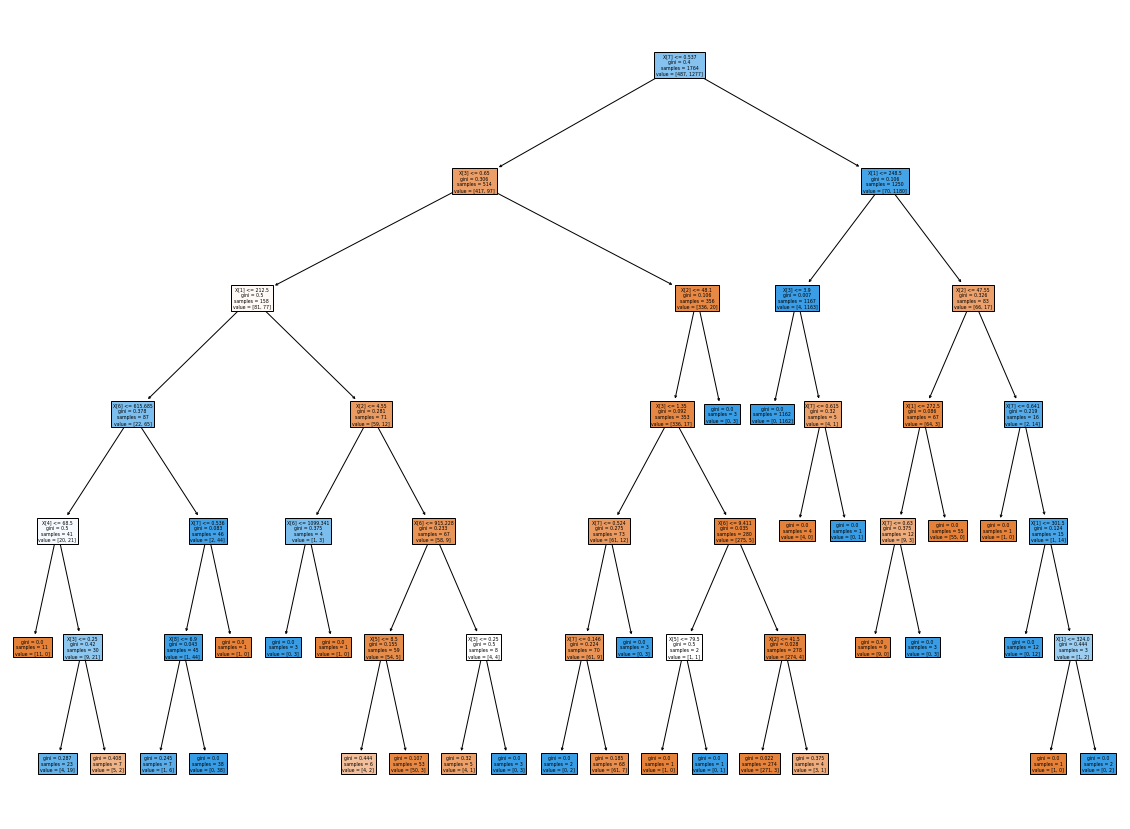

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(classifier,filled=True)

1 What is the accuracy of the Decision Tree model on the test dataset?

In [ ]:
print('Accuracy of Decision Tree model on test dataset is: ',accuracy_score(y_test_dec,y_pred_dec))

Accuracy of Decision Tree model on test dataset is:  0.9569160997732427


2 Find the number of false positives & False negatives on the test data set.

In [ ]:
confusion_matrix(y_test_dec,y_pred_dec)

array([[121,  10],
       [  9, 301]])

Number of false positives: 11

Number of false negatives: 9

3 Calculate the precision and recall on the test dataset.

In [ ]:
print('Precision of Decision Tree model on test dataset is: ',precision_score(y_test_dec,y_pred_dec))
print('Recall of Decision Tree model on test dataset is: ',recall_score(y_test_dec,y_pred_dec))

Precision of Decision Tree model on test dataset is:  0.9678456591639871
Recall of Decision Tree model on test dataset is:  0.9709677419354839


4 What is the Gini Impurity of the train dataset?

In [ ]:
def gini(x):
    total = 0
    for i, j in enumerate(x[:-1], 1):
        total += np.sum(np.abs(j - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [ ]:
y_train_dec1 = y_train_dec.astype(np.float32)
print('Gini impurity of train dataset is: ',gini(y_train_dec1))

Gini impurity of train dataset is:  0.2760770952892695


5 What is the entropy of the train dataset?

In [ ]:
import math
def entropy_cal(probabilities):
    total_entropy = 0
    for i in probabilities:
        total_entropy += -i * math.log2(i)
    return total_entropy

In [ ]:
y_pred_probs_train = classifier.predict_proba(X_train_dec)[:,1]
probabilities_train = y_pred_probs_train[:15]
entropy = entropy_cal(probabilities_train)
print('Entropy of train dataset is: ',entropy)

Entropy of train dataset is:  0.7792891284456005


6. What is the Gini Impurity of the test dataset?

In [ ]:
y_test_dec1 = y_test_dec.astype(np.float32)
print('Gini impurity of test dataset is: ',gini(y_test_dec1))

Gini impurity of test dataset is:  0.29705215031118304


7. What is the entropy of the test dataset?

In [ ]:
y_pred_probs_test = classifier.predict_proba(X_test_dec)[:,1]
probabilities_test = y_pred_probs_test[:15]
entropy = entropy_cal(probabilities_test)
print('Entropy of test dataset is: ',entropy)

Entropy of test dataset is:  0.4758659987409946


# **Random Forest:**

In [ ]:
X_train_for = train_1.drop('Life expectancy',axis=1).values
y_train_for = train_1['Life expectancy'].values
X_test_for = test_1.drop('Life expectancy',axis=1).values
y_test_for = test_1['Life expectancy'].values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_for,y_train_for)
y_pred_for = clf.predict(X_test_for)

1 What is the accuracy of the model on the test dataset?

In [ ]:
print('Accuracy of the model on test dataset is: ',accuracy_score(y_test_for,y_pred_for))

Accuracy of the model on test dataset is:  0.9705215419501134


2 Find the number of false positives & False negatives on the test data set

In [ ]:
confusion_matrix(y_test_for,y_pred_for)

array([[122,   9],
       [  4, 306]])

Number of false positives: 10

Number of false negatives: 6

3 Calculate the precision and recall on the test dataset.

In [ ]:
print('Precision of the model on test dataset is: ',precision_score(y_test_for,y_pred_for))
print('Recall of the model on test dataset is: ',recall_score(y_test_for,y_pred_for))

Precision of the model on test dataset is:  0.9714285714285714
Recall of the model on test dataset is:  0.9870967741935484
